<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/Multivariate_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multivariate Random Forest

https://github.com/souhirbenamor/Electricity_Price_Forecating/blob/main/Collected%20codes/ARIMA%2BMultivariate%20RF%2B%20Multivariate%20LSTM%2B%20Naive%20model%2B%20Python/Random_Forest%20(1).ipynb


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf
import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Conv1D, Conv2D, MaxPooling1D, Flatten
from keras.layers import GRU

import numpy as np

In [ ]:
df = pd.read_csv('/content/BE.csv')
df.drop(df.loc[df['Date'].duplicated()].index, inplace = True)
df['Date'] = pd.to_datetime(df['Date'])

# df = df.sort_values(df['datetime'], ascending=[True])
df.set_index(df['Date'], inplace = True)
df.drop(columns = [ 'Date'], inplace = True)
df


,Prices,Generation forecast,System load forecast
Date,,,
2011-01-09 00:00:00,32.54,63065.0,63000.0
2011-01-09 01:00:00,21.55,62715.0,58800.0
2011-01-09 02:00:00,15.71,61952.0,58500.0
2011-01-09 03:00:00,10.58,59262.0,54300.0
2011-01-09 04:00:00,10.32,56883.0,51900.0
...,...,...,...
2016-12-31 19:00:00,40.84,70329.0,73957.0
2016-12-31 20:00:00,40.10,69121.0,72544.0
2016-12-31 21:00:00,36.00,66647.0,69451.0


In [ ]:
def table2lags(table, max_lag, min_lag=0, separator='_'):
    """ Given a dataframe, return a dataframe with different lags of all its columns """
    values=[]
    for i in range(min_lag, max_lag + 1):
        values.append(table.shift(i).copy())
        values[-1].columns = [c + separator + str(i) for c in table.columns]
    return pd.concat(values, axis=1)

In [ ]:
df.head()

,Prices,Generation forecast,System load forecast
Date,,,
2011-01-09 00:00:00,32.54,63065.0,63000.0
2011-01-09 01:00:00,21.55,62715.0,58800.0
2011-01-09 02:00:00,15.71,61952.0,58500.0
2011-01-09 03:00:00,10.58,59262.0,54300.0
2011-01-09 04:00:00,10.32,56883.0,51900.0


In [ ]:
df_lagged = table2lags(df, 168, 24)

In [ ]:
df_lagged.columns

Index([' Prices_24', ' Generation forecast_24', ' System load forecast_24',
       ' Prices_25', ' Generation forecast_25', ' System load forecast_25',
       ' Prices_26', ' Generation forecast_26', ' System load forecast_26',
       ' Prices_27',
       ...
       ' System load forecast_165', ' Prices_166', ' Generation forecast_166',
       ' System load forecast_166', ' Prices_167', ' Generation forecast_167',
       ' System load forecast_167', ' Prices_168', ' Generation forecast_168',
       ' System load forecast_168'],
      dtype='object', length=435)

In [ ]:
df_lagged.shape

(52416, 435)

In [ ]:
x_train = df_lagged[168:25000]
x_valid = df_lagged[25000:34944]
x_test = df_lagged[34944:]

In [ ]:
y_train = df[' Prices'][168:25000]
y_valid = df[' Prices'][25000:34944]
y_test = df[' Prices'][34944:]

In [ ]:
x_test.head()

,Prices_24,Generation forecast_24,System load forecast_24,Prices_25,Generation forecast_25,System load forecast_25,Prices_26,Generation forecast_26,System load forecast_26,Prices_27,Generation forecast_27,System load forecast_27,Prices_28,Generation forecast_28,System load forecast_28,Prices_29,Generation forecast_29,System load forecast_29,Prices_30,Generation forecast_30,System load forecast_30,Prices_31,Generation forecast_31,System load forecast_31,Prices_32,Generation forecast_32,System load forecast_32,Prices_33,Generation forecast_33,System load forecast_33,Prices_34,Generation forecast_34,System load forecast_34,Prices_35,Generation forecast_35,System load forecast_35,Prices_36,Generation forecast_36,System load forecast_36,Prices_37,...,System load forecast_155,Prices_156,Generation forecast_156,System load forecast_156,Prices_157,Generation forecast_157,System load forecast_157,Prices_158,Generation forecast_158,System load forecast_158,Prices_159,Generation forecast_159,System load forecast_159,Prices_160,Generation forecast_160,System load forecast_160,Prices_161,Generation forecast_161,System load forecast_161,Prices_162,Generation forecast_162,System load forecast_162,Prices_163,Generation forecast_163,System load forecast_163,Prices_164,Generation forecast_164,System load forecast_164,Prices_165,Generation forecast_165,System load forecast_165,Prices_166,Generation forecast_166,System load forecast_166,Prices_167,Generation forecast_167,System load forecast_167,Prices_168,Generation forecast_168,System load forecast_168
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,46.97,73980.0,69805.0,48.45,75410.0,71699.0,48.76,75008.0,67372.0,42.99,75958.0,69294.0,48.81,78528.0,72777.0,53.13,80550.0,74786.0,54.10,78940.0,72133.0,50.24,76272.0,67610.0,39.73,73693.0,65172.0,39.78,74355.0,66287.0,41.00,76170.0,68957.0,44.87,78259.0,72639.0,48.64,79458.0,70865.0,45.30,...,69697.0,40.11,76681.0,67637.0,39.94,75636.0,65600.0,34.09,73645.0,63959.0,32.83,69418.0,60756.0,27.51,65661.0,59630.0,29.99,63990.0,57286.0,29.87,63237.0,55774.0,29.84,62926.0,54542.0,29.54,62178.0,55707.0,27.44,62329.0,58179.0,20.73,65607.0,61516.0,28.75,67052.0,61648.0,29.99,69498.0,65967.0
2015-01-04 01:00:00,43.27,71309.0,65463.0,46.97,73980.0,69805.0,48.45,75410.0,71699.0,48.76,75008.0,67372.0,42.99,75958.0,69294.0,48.81,78528.0,72777.0,53.13,80550.0,74786.0,54.10,78940.0,72133.0,50.24,76272.0,67610.0,39.73,73693.0,65172.0,39.78,74355.0,66287.0,41.00,76170.0,68957.0,44.87,78259.0,72639.0,48.64,...,64760.0,41.54,76073.0,69697.0,40.11,76681.0,67637.0,39.94,75636.0,65600.0,34.09,73645.0,63959.0,32.83,69418.0,60756.0,27.51,65661.0,59630.0,29.99,63990.0,57286.0,29.87,63237.0,55774.0,29.84,62926.0,54542.0,29.54,62178.0,55707.0,27.44,62329.0,58179.0,20.73,65607.0,61516.0,28.75,67052.0,61648.0
2015-01-04 02:00:00,41.76,70103.0,66061.0,43.27,71309.0,65463.0,46.97,73980.0,69805.0,48.45,75410.0,71699.0,48.76,75008.0,67372.0,42.99,75958.0,69294.0,48.81,78528.0,72777.0,53.13,80550.0,74786.0,54.10,78940.0,72133.0,50.24,76272.0,67610.0,39.73,73693.0,65172.0,39.78,74355.0,66287.0,41.00,76170.0,68957.0,44.87,...,62429.0,42.23,73630.0,64760.0,41.54,76073.0,69697.0,40.11,76681.0,67637.0,39.94,75636.0,65600.0,34.09,73645.0,63959.0,32.83,69418.0,60756.0,27.51,65661.0,59630.0,29.99,63990.0,57286.0,29.87,63237.0,55774.0,29.84,62926.0,54542.0,29.54,62178.0,55707.0,27.44,62329.0,58179.0,20.73,65607.0,61516.0
2015-01-04 03:00:00,37.54,67577.0,62638.0,41.76,70103.0,66061.0,43.27,71309.0,65463.0,46.97,73980.0,69805.0,48.45,75410.0,71699.0,48.76,75008.0,67372.0,42.99,75958.0,69294.0,48.81,78528.0,72777.0,53.13,80550.0,74786.0,54.10,78940.0,72133.0,50.24,76272.0,67610.0,39.73,73693.0,65172.0,39.78,74355.0,66287.0,41.00,...,61830.0,45.12,72087.0,62429.0,42.23,73630.0,64760.0,41.54,76073.0,69697.0,40.11,76681.0,67637.0,39.94,75636.0,65600.0,34.09,73645.0,63959.0,32.83,69418.0,60756.0,27.51,65661.0,59630.0,29.99,63990.0,57286.0,2

In [ ]:
rf = RandomForestRegressor(n_estimators=10, max_features=2,
    criterion='mae',
    max_depth=1)

    
rf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mae', max_depth=1, max_features=2,
                      n_estimators=10)

In [ ]:
y_test = pd.DataFrame(y_test)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
y_test['predictions'] = y_pred

In [ ]:
y_test['difference'] = np.abs(y_test[' Prices'] - y_test['predictions'])
y_test['% error'] = (y_test['difference']/y_test[' Prices'])*100
np.mean(y_test['% error'])

104.4506021837986

In [ ]:
y_test['% error'] = (y_test['difference']/y_test[' Prices'])*100

In [ ]:
y_test

,Prices,predictions,difference,% error
Date,,,,
2015-01-04 00:00:00,36.26,50.9330,14.6730,40.466078
2015-01-04 01:00:00,32.28,50.9330,18.6530,57.785006
2015-01-04 02:00:00,27.63,49.3935,21.7635,78.767644
2015-01-04 03:00:00,27.03,48.0585,21.0285,77.796892
2015-01-04 04:00:00,27.04,48.0585,21.0185,77.731139
...,...,...,...,...
2016-12-31 19:00:00,40.84,47.8085,6.9685,17.062929
2016-12-31 20:00:00,40.10,47.1995,7.0995,17.704489
2016-12-31 21:00:00,36.00,47.1995,11.1995,31.109722


In [ ]:
np.mean(y_test['% error'])

104.4506021837986

In [ ]:
y_test.drop(y_test.loc[y_test['% error'] > 2000].index, inplace = True)

In [ ]:
np.mean(np.abs(y_test[' Prices'] - y_test['predictions']) * 100)

1469.0974377326313

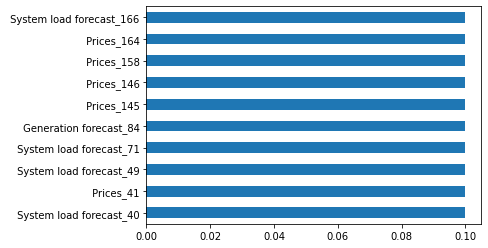

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=df_lagged.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the random grid
gridsearch = {'bootstrap': [True],
     'max_depth': [10, 250],
     'min_samples_leaf': [2, 5],
     'n_estimators': [100, 200]}
# print(gridsearch)
# {'bootstrap': [True],
#  'max_depth': [10, 50, 250,1000],
#  'max_features': [2, 'sqrt'],
#  'min_samples_leaf': [1, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 1000, 2000]}

In [ ]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_GridSearch = GridSearchCV(
 estimator = rf, 
 param_grid = gridsearch, 
 cv = 2,
 verbose=2, 
 n_jobs = 1)

In [ ]:
rf_GridSearch.fit(x_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100; total time= 4.9min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=100; total time= 5.0min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=200; total time= 9.8min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, n_estimators=200; total time=10.1min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=5, n_estimators=100; total time= 4.9min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=5, n_estimators=100; total time= 5.0min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=5, n_estimators=200; total time= 9.8min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=5, n_estimators=200; total time=10.0min
[CV] END bootstrap=True, max_depth=250, min_samples_leaf=2, n_estimators=100; total time= 7.7min
[CV] END bootstrap=True, max_depth=250, min_samples_leaf=2, n_estimators=10

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 250],
                         'min_samples_leaf': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [ ]:
print(rf_GridSearch.best_score_)
print(rf_GridSearch.best_params_)

0.32065850849704525
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 100}


In [ ]:
rf = RandomForestRegressor(n_estimators=250, max_features=5,
    criterion='mae',
    max_depth=15)

    
rf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mae', max_depth=15, max_features=5,
                      n_estimators=250)

In [27]:
prediciton = rf.predict(x_test)

In [28]:
prediciton = pd.DataFrame(prediciton)

prediciton.to_csv('randomforestprediction')

In [29]:
len(prediciton)

17472

In [30]:
len(x_test)

17472

In [31]:
x_test.isna().sum()

 Prices_24                   0
 Generation forecast_24      0
 System load forecast_24     0
 Prices_25                   0
 Generation forecast_25      0
                            ..
 Generation forecast_167     0
 System load forecast_167    0
 Prices_168                  0
 Generation forecast_168     0
 System load forecast_168    0
Length: 435, dtype: int64

In [32]:
y_test

,Prices,predictions,difference,% error
Date,,,,
2015-01-04 00:00:00,36.26,50.9330,14.6730,40.466078
2015-01-04 01:00:00,32.28,50.9330,18.6530,57.785006
2015-01-04 02:00:00,27.63,49.3935,21.7635,78.767644
2015-01-04 03:00:00,27.03,48.0585,21.0285,77.796892
2015-01-04 04:00:00,27.04,48.0585,21.0185,77.731139
...,...,...,...,...
2016-12-31 19:00:00,40.84,47.8085,6.9685,17.062929
2016-12-31 20:00:00,40.10,47.1995,7.0995,17.704489
2016-12-31 21:00:00,36.00,47.1995,11.1995,31.109722


In [47]:
prediciton = y_test.iloc[:,:2]

In [48]:
prediciton

,Prices,predictions
Date,,
2015-01-04 00:00:00,36.26,50.9330
2015-01-04 01:00:00,32.28,50.9330
2015-01-04 02:00:00,27.63,49.3935
2015-01-04 03:00:00,27.03,48.0585
2015-01-04 04:00:00,27.04,48.0585
...,...,...
2016-12-31 19:00:00,40.84,47.8085
2016-12-31 20:00:00,40.10,47.1995
2016-12-31 21:00:00,36.00,47.1995


In [49]:
prediciton.rename(columns = {0:'prediction'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
prediciton['difference'] = np.abs(prediciton[' Prices'] - prediciton['predictions'])
prediciton['% error'] = ((prediciton['difference'] + 0.5) /(prediciton[' Prices'] + 0.5))*100
# np.mean(prediciton['% error'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
prediciton['% error'].mean()

49.45276163361783

In [53]:
from numpy import inf

In [54]:
prediciton.loc[prediciton['% error'] == 36798.27999999999]

,Prices,predictions,difference,% error
Date,,,,


In [56]:
mape = 100 * (prediciton['difference'] / prediciton[' Prices'])
accuracy = 100 - np.mean(mape[np.isfinite(mape)])
100 - accuracy

51.985218332512105

In [57]:
prediciton['% error'] = mape

In [58]:
np.mean(mape[np.isfinite(mape)])

51.985218332512105

In [59]:
mape

Date
2015-01-04 00:00:00    40.466078
2015-01-04 01:00:00    57.785006
2015-01-04 02:00:00    78.767644
2015-01-04 03:00:00    77.796892
2015-01-04 04:00:00    77.731139
                         ...    
2016-12-31 19:00:00    17.062929
2016-12-31 20:00:00    17.704489
2016-12-31 21:00:00    31.109722
2016-12-31 22:00:00    34.855714
2016-12-31 23:00:00    37.545793
Length: 17465, dtype: float64

In [60]:
mape[np.isfinite(mape)].mean()

51.985218332512105

In [64]:
# Save prediction as CSV
import pandas as pd
from pandas import read_csv
import csv
y_pred=prediciton
y_pred=pd.DataFrame(y_pred)
print(y_pred)
y_pred.to_csv("y_pred.csv", header=True, quoting=csv.QUOTE_NONE, escapechar=' ')

                      Prices  predictions  difference    % error
Date                                                            
2015-01-04 00:00:00    36.26      50.9330     14.6730  40.466078
2015-01-04 01:00:00    32.28      50.9330     18.6530  57.785006
2015-01-04 02:00:00    27.63      49.3935     21.7635  78.767644
2015-01-04 03:00:00    27.03      48.0585     21.0285  77.796892
2015-01-04 04:00:00    27.04      48.0585     21.0185  77.731139
...                      ...          ...         ...        ...
2016-12-31 19:00:00    40.84      47.8085      6.9685  17.062929
2016-12-31 20:00:00    40.10      47.1995      7.0995  17.704489
2016-12-31 21:00:00    36.00      47.1995     11.1995  31.109722
2016-12-31 22:00:00    35.00      47.1995     12.1995  34.855714
2016-12-31 23:00:00    34.94      48.0585     13.1185  37.545793

[17465 rows x 4 columns]
